In [56]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\6654_project\\GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


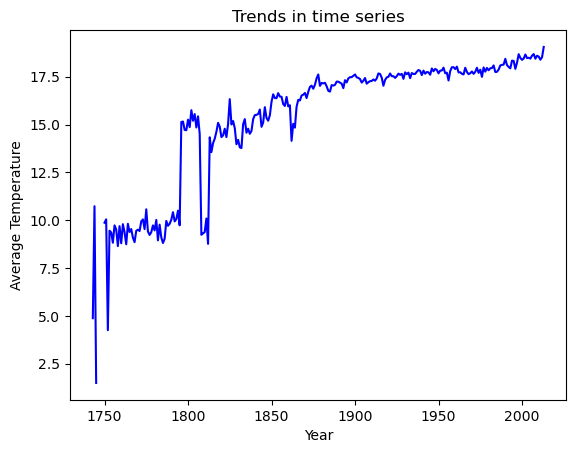

In [57]:
df['dt']=pd.to_datetime(df['dt'])
x=df['Year']=df['dt'].dt.year
y=df.groupby('Year')['AverageTemperature'].mean()
plt.plot(y.index,y.values,color='blue')
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Trends in time series")
plt.show()

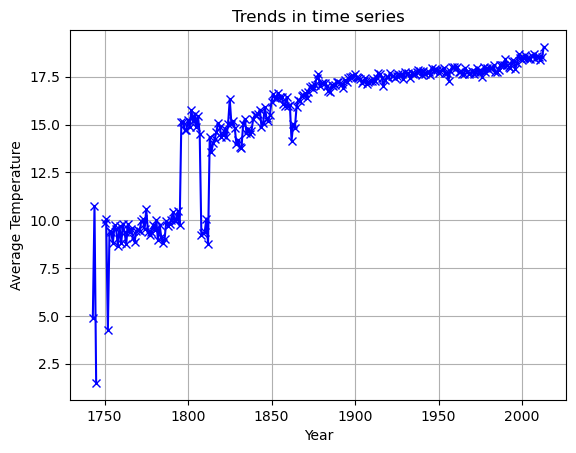

In [58]:
df['dt']=pd.to_datetime(df['dt'],errors='coerce')
df['Year']=df['dt'].dt.year
annual_avg_temp=df.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.plot(annual_avg_temp["Year"],annual_avg_temp['AverageTemperature'],color='blue',marker='x')
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Trends in time series")
plt.grid(True)
plt.show()

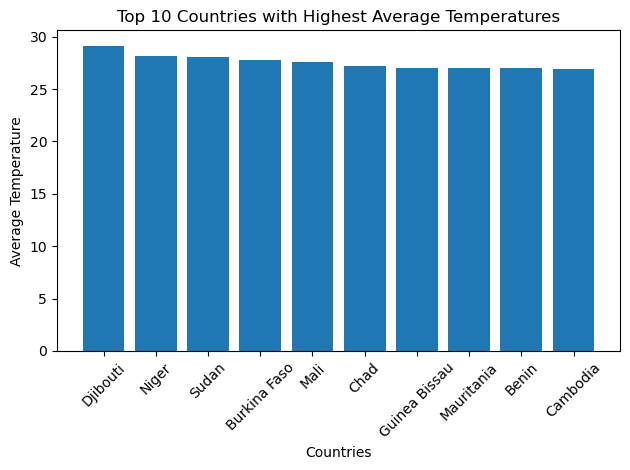

In [59]:
import matplotlib.pyplot as plt
a = df.dropna(subset=['AverageTemperature']).groupby('Country')['AverageTemperature'].mean()
b = a.sort_values(ascending=False).head(10)
x = b.index 
y = b.values  
plt.bar(x, y, linewidth=2)
plt.xlabel('Countries')
plt.ylabel('Average Temperature')
plt.title('Top 10 Countries with Highest Average Temperatures')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

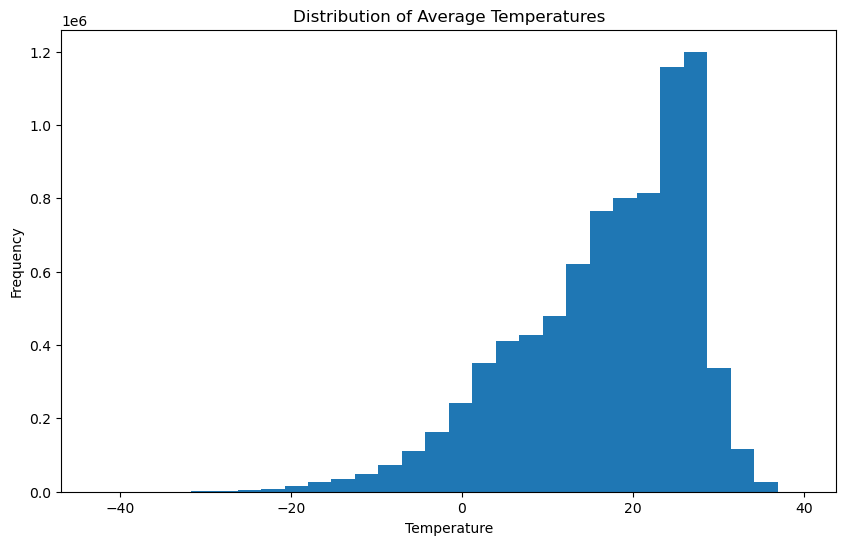

In [60]:
x=df['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(x,bins=30)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperatures')
plt.show()

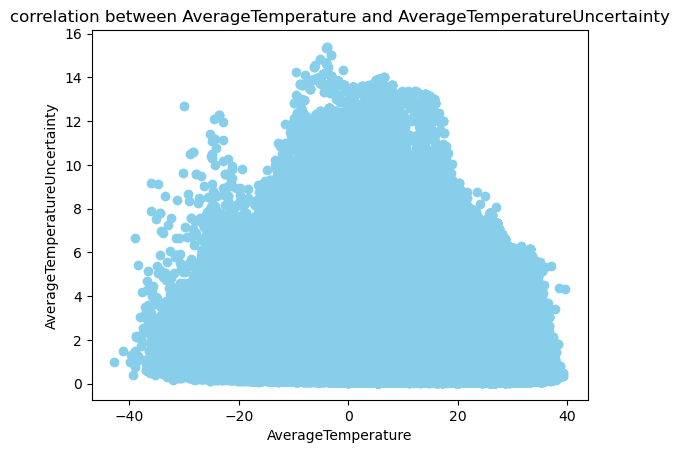

In [61]:
x=df['AverageTemperature'].dropna()
y=df['AverageTemperatureUncertainty'].dropna()
plt.scatter(x,y,marker='o',color='skyblue')
plt.title('correlation between AverageTemperature and AverageTemperatureUncertainty')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.show()

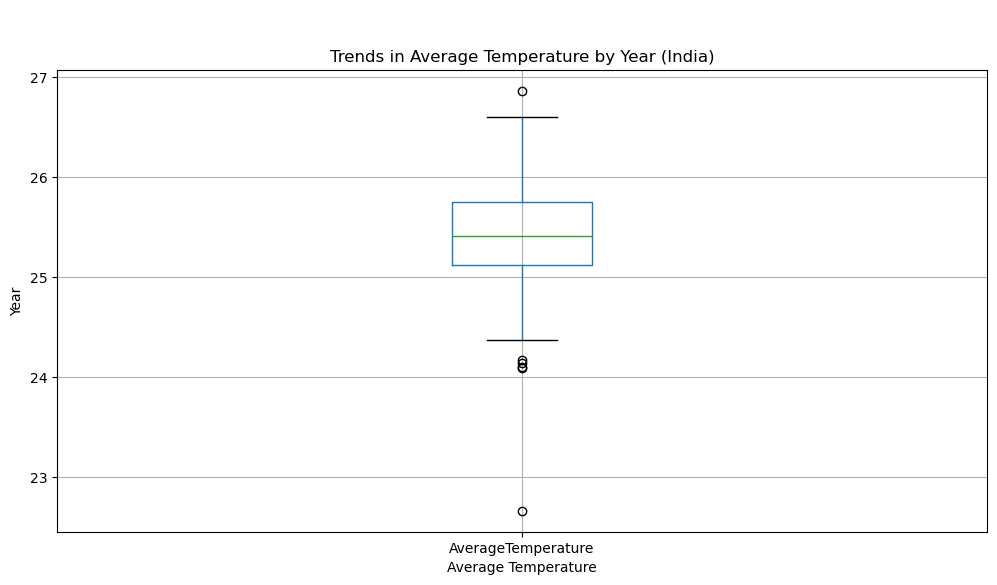

In [62]:
df_india = df[df['Country'] == 'India'].copy()
df_india['dt'] = pd.to_datetime(df_india['dt'], errors='coerce')
df_india['Year'] = df_india['dt'].dt.year
annual_avg_temp_india = df_india.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
annual_avg_temp_india.boxplot(column='AverageTemperature') 
plt.xlabel("Average Temperature")
plt.ylabel("Year")
plt.title("Trends in Average Temperature by Year (India)")
plt.suptitle('   ')
plt.show()

In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


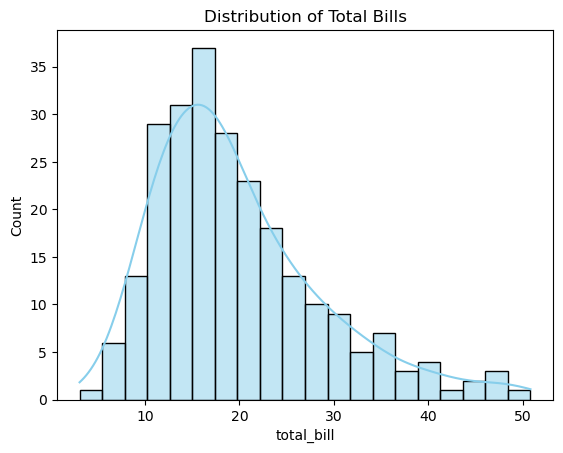

In [27]:
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='skyblue')
plt.title("Distribution of Total Bills")
plt.show()

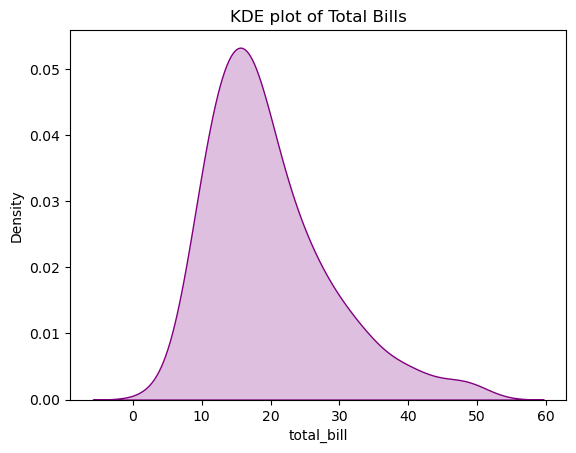

In [31]:
sns.kdeplot(data=tips,x='total_bill',fill=True,color='purple')
plt.title("KDE plot of Total Bills")
plt.show()

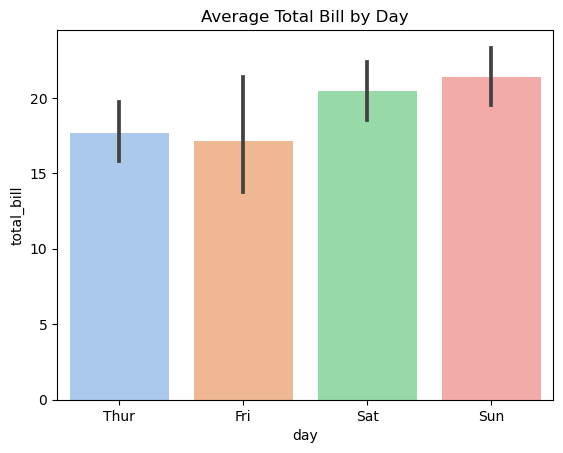

In [41]:
sns.barplot(data=tips,x='day',y='total_bill',palette='pastel')
plt.title("Average Total Bill by Day")
plt.show()

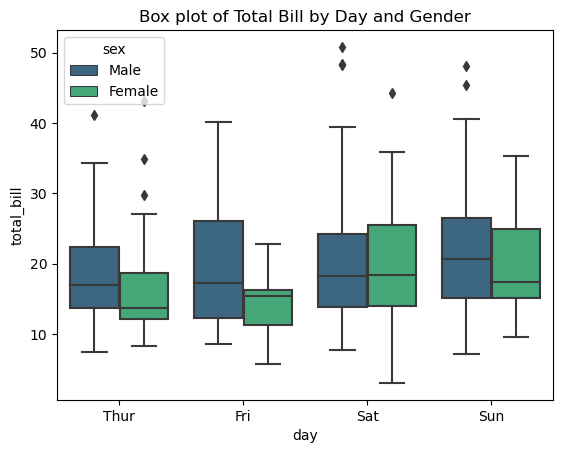

In [40]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='viridis')
plt.title("Box plot of Total Bill by Day and Gender")
plt.show()

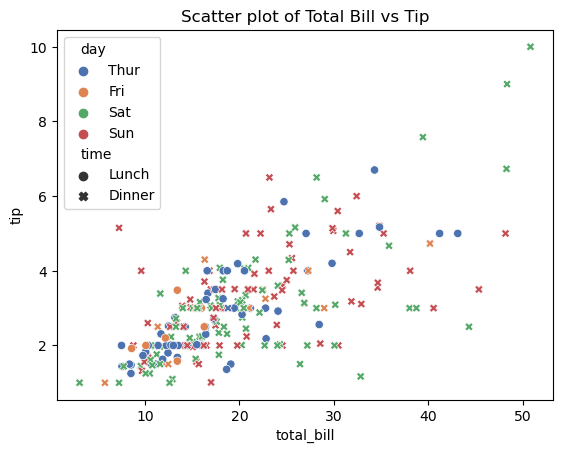

In [42]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',palette='deep',style='time')
plt.title("Scatter plot of Total Bill vs Tip")
plt.show()

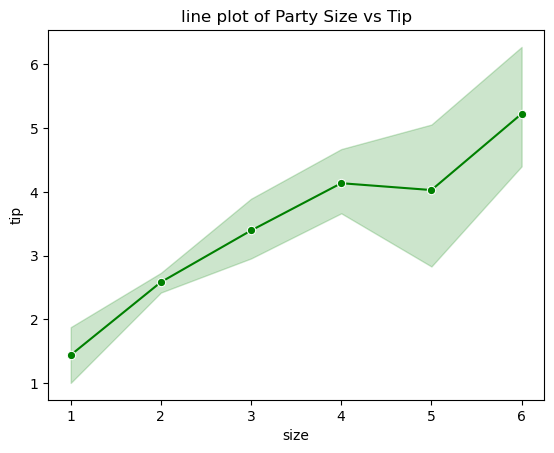

In [43]:
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.title("line plot of Party Size vs Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


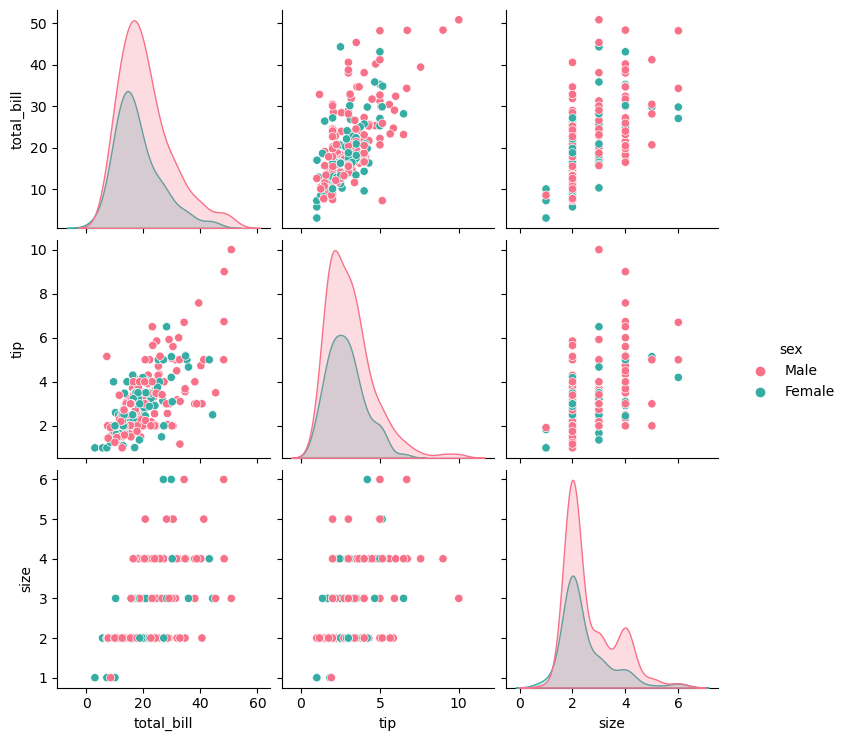

In [46]:
sns.pairplot(data=tips,hue='sex',palette='husl')
plt.show()

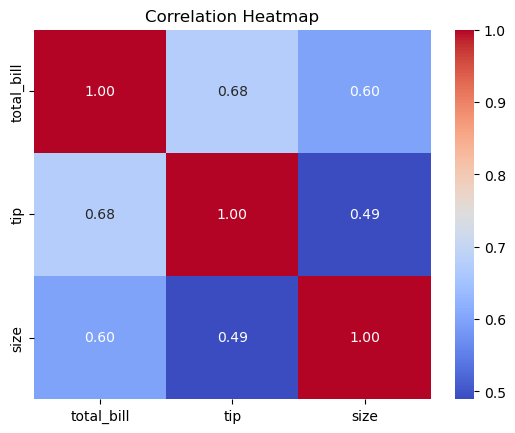

In [49]:
numeric_cols = tips.select_dtypes(include=['number']).columns
correlation_matrix = tips[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()